In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 당별로 부정/긍정 빈도수 확인

In [20]:
df = pd.read_csv('./data/긍정부정_마지막.csv')
df = df[df['party_name'] != '코리아']

df

,party_content,party_name,label
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당,LABEL_0
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당,LABEL_0
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당,LABEL_0
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당,LABEL_0
5,(사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장관 ...,더불어민주당,LABEL_1
...,...,...,...
243421,"이에 따라 양 정당은 (12석), (6석), 사회민주당(6석) 및 무소속 의...",무소속,LABEL_0
243422,"이에 따라 양 정당은 (12석), 노동당(6석), 사회민주당(6석) 및 의...",노동당,LABEL_0
243423,"이에 따라 양 정당은 녹색당(12석), (6석), 사회민주당(6석) 및 의...",녹색당,LABEL_0
243424,보수우파 성향으로 비슷한 정책 노선을 갖고 있는 공화당과 통일아일랜드당은 이...,공화당,LABEL_0


In [29]:
df['label'].unique()

array(['LABEL_0', 'LABEL_1'], dtype=object)

In [21]:
df['label'] = df['label'].apply(lambda x: '긍정' if x == 'LABEL_1' else '부정')

In [22]:
df.head()

,party_content,party_name,label
0,"더불어민주당은 정책, 영입을 병행 추진하고 있다",더불어민주당,부정
1,한국당 미래통합당 의원은 “청년들이 선호할 수 있는 정당으로 거듭나야 한다”고 했다,미래통합당,부정
2,[머니투데이 한고은 기자] (서울=뉴스1) 임세영 기자 = 곽상도 자유한국당...,미래통합당,부정
4,"미래통합당 친문농단특위 위원장, 1일 고발""지방선거 전 송철호에 靑행정관 소개""""공...",미래통합당,부정
5,(사진=노진환 기자)[이데일리 김겨레 기자]자유한국당이 1일 추미애 법무부 장관 ...,더불어민주당,긍정


In [23]:
res_dic = {}


for party, label in zip(df['party_name'], df['label']):
    if party not in res_dic:
        res_dic[party] = {'긍정' : 0, '부정' : 0}
    else:
        res_dic[party][label] += 1

for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 더불어민주당
긍정 : 9077
부정 : 48390
당 : 미래통합당
긍정 : 6885
부정 : 44288
당 : 미래당
긍정 : 2483
부정 : 12795
당 : 정의당
긍정 : 4257
부정 : 13975
당 : 민중당
긍정 : 643
부정 : 1751
당 : 국민의당
긍정 : 2365
부정 : 9352
당 : 더불어시민당
긍정 : 1261
부정 : 6098
당 : 무소속
긍정 : 1503
부정 : 10846
당 : 우리공화당
긍정 : 586
부정 : 1842
당 : 공화당
긍정 : 817
부정 : 2426
당 : 민생당
긍정 : 2403
부정 : 10048
당 : 노동당
긍정 : 98
부정 : 361
당 : 미래한국당
긍정 : 2734
부정 : 15179
당 : 국가혁명배당금당
긍정 : 308
부정 : 1812
당 : 우리당
긍정 : 115
부정 : 1044
당 : 한나라당
긍정 : 109
부정 : 669
당 : 녹색당
긍정 : 365
부정 : 983
당 : 새누리당
긍정 : 536
부정 : 1996
당 : 열린민주당
긍정 : 1215
부정 : 5636
당 : 여성의당
긍정 : 44
부정 : 74
당 : 한국경제당
긍정 : 126
부정 : 482
당 : 자유당
긍정 : 57
부정 : 184
당 : 새벽당
긍정 : 16
부정 : 52
당 : 기본소득당
긍정 : 169
부정 : 436
당 : 가자!평화인권당
긍정 : 59
부정 : 109
당 : 국민새정당
긍정 : 35
부정 : 135
당 : 기독자유통일당
긍정 : 96
부정 : 220
당 : 친박신당
긍정 : 246
부정 : 517
당 : 통일민주당
긍정 : 9
부정 : 36
당 : 민중민주당
긍정 : 5
부정 : 21
당 : 깨어있는시민연대당
긍정 : 8
부정 : 17
당 : 미래민주당
긍정 : 14
부정 : 39
당 : 충청의미래당
긍정 : 6
부정 : 18
당 : 가자환경당
긍정 : 133
부정 : 308
당 : 자영업당
긍정 : 7
부정 : 17
당 : 대한당
긍정 : 4
부정 : 1
당 : 

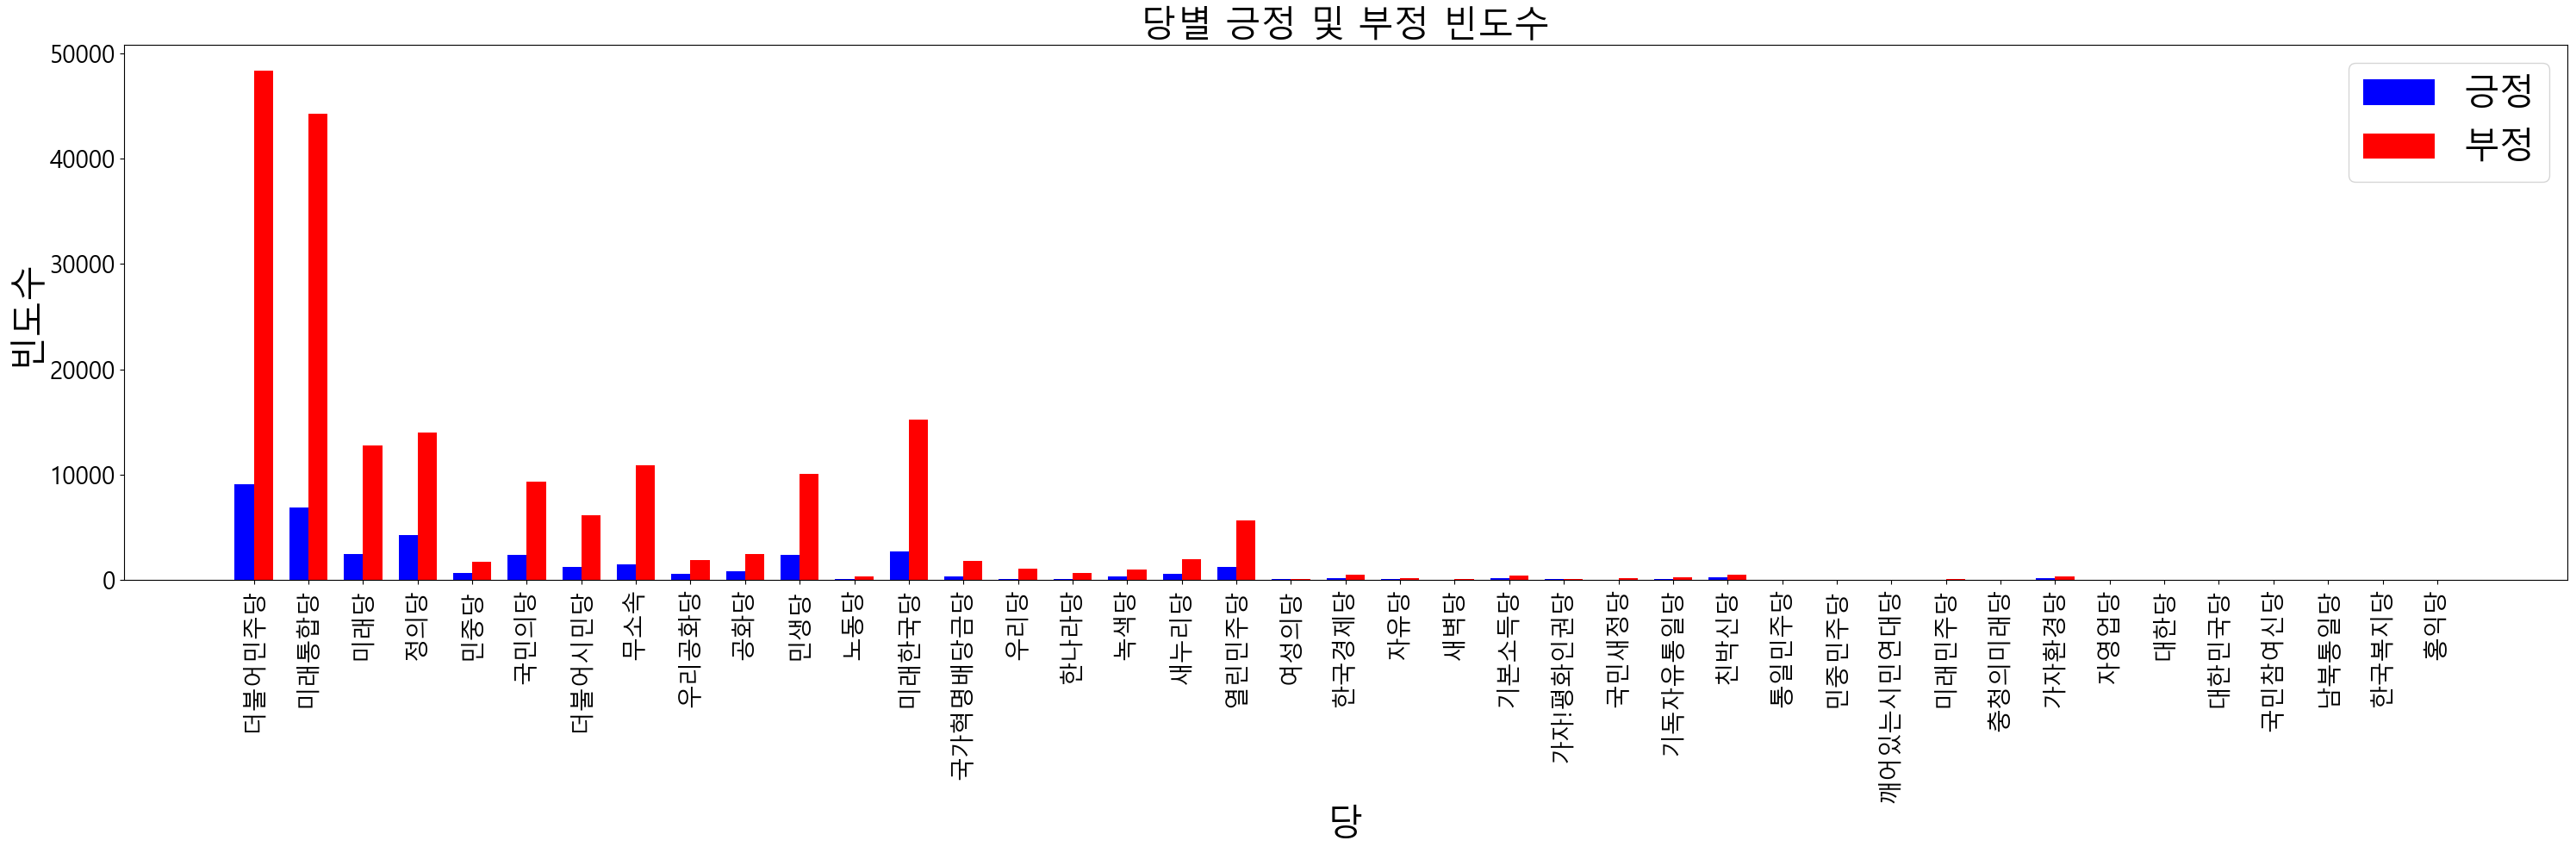

In [24]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')
plt.yticks(fontsize=20)

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [25]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(41, 2)


,긍정,부정
더불어민주당,9077,48390
미래통합당,6885,44288
미래당,2483,12795
정의당,4257,13975
민중당,643,1751
국민의당,2365,9352
더불어시민당,1261,6098
무소속,1503,10846
우리공화당,586,1842
공화당,817,2426


# 당선 여부 확인

In [27]:
res_df = pd.read_csv('./data/2020_당선결과.csv')
res_df

,name,party
0,이낙연,더불어민주당
1,고민정,더불어민주당
2,홍준표,무소속
3,배현진,미래통합당
4,심상정,정의당
...,...,...
295,이달곤,미래통합당
296,김철민,더불어민주당
297,김정호,더불어민주당
298,조정식,더불어민주당


In [28]:
res_gb = res_df.groupby(['party']).count().reset_index()

res_gb

,party,name
0,국민의당,3
1,더불어민주당,163
2,더불어시민당,17
3,무소속,5
4,미래통합당,84
5,미래한국당,19
6,열린민주당,3
7,정의당,6


In [29]:
# 부정 긍정 빈도수

num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.head()

,party,pos,neg
0,더불어민주당,9077,48390
1,미래통합당,6885,44288
2,미래당,2483,12795
3,정의당,4257,13975
4,민중당,643,1751


In [30]:
# 멀티 인덱스 삭제

num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [31]:
# 빈도수, 당선 수
num_res_df = pd.merge(res_gb, num_df, on = 'party', how = 'right')
num_res_df.fillna(0, inplace = True)
num_res_df.columns = [['party', 'res', 'pos', 'neg']]
num_res_df.columns = num_res_df.columns.get_level_values(0)
num_res_df = num_res_df.sort_values('res', ascending = False)
num_res_df = num_res_df.reset_index(drop = True)

num_res_df

,party,res,pos,neg
0,더불어민주당,163.0,9077,48390
1,미래통합당,84.0,6885,44288
2,미래한국당,19.0,2734,15179
3,더불어시민당,17.0,1261,6098
4,정의당,6.0,4257,13975
5,무소속,5.0,1503,10846
6,국민의당,3.0,2365,9352
7,열린민주당,3.0,1215,5636
8,미래민주당,0.0,14,39
9,기독자유통일당,0.0,96,220


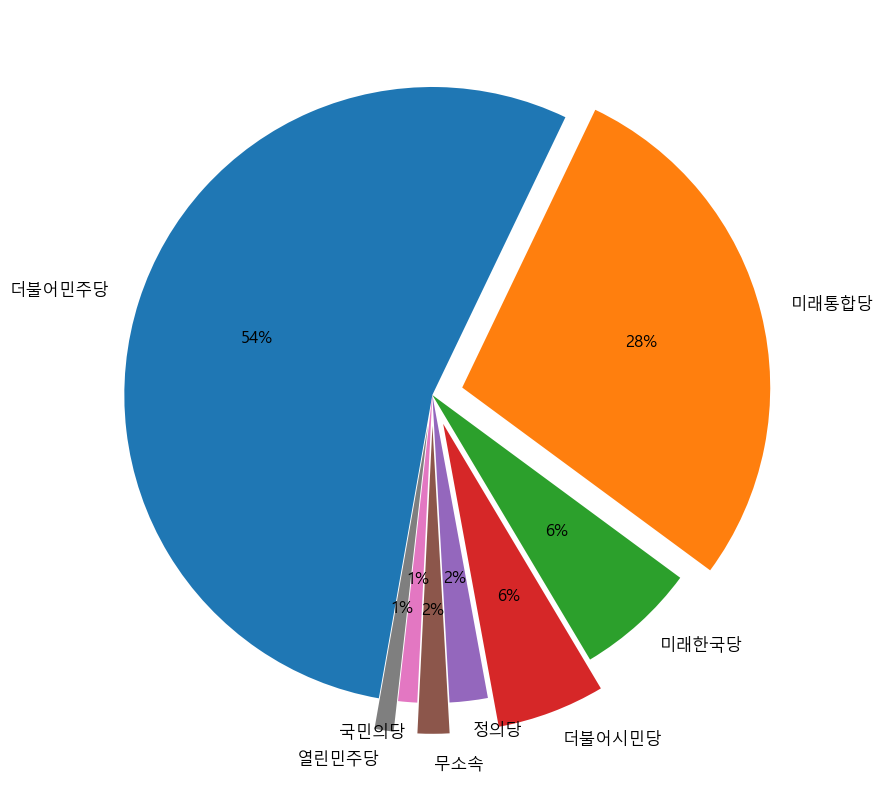

In [32]:
df = num_res_df[:8]

ratio = list(df['res'].values)
labels = list(df['party'].values)
explode = [0, 0.10, 0, 0.10, 0, 0.10, 0, 0.10]

plt.figure(figsize = (10, 10))
plt.rcParams.update({'font.size': 12})  # 원하는 폰트 크기로 변경
plt.pie(ratio, labels = labels, startangle=260, autopct='%1.0f%%', counterclock = False, explode = explode);

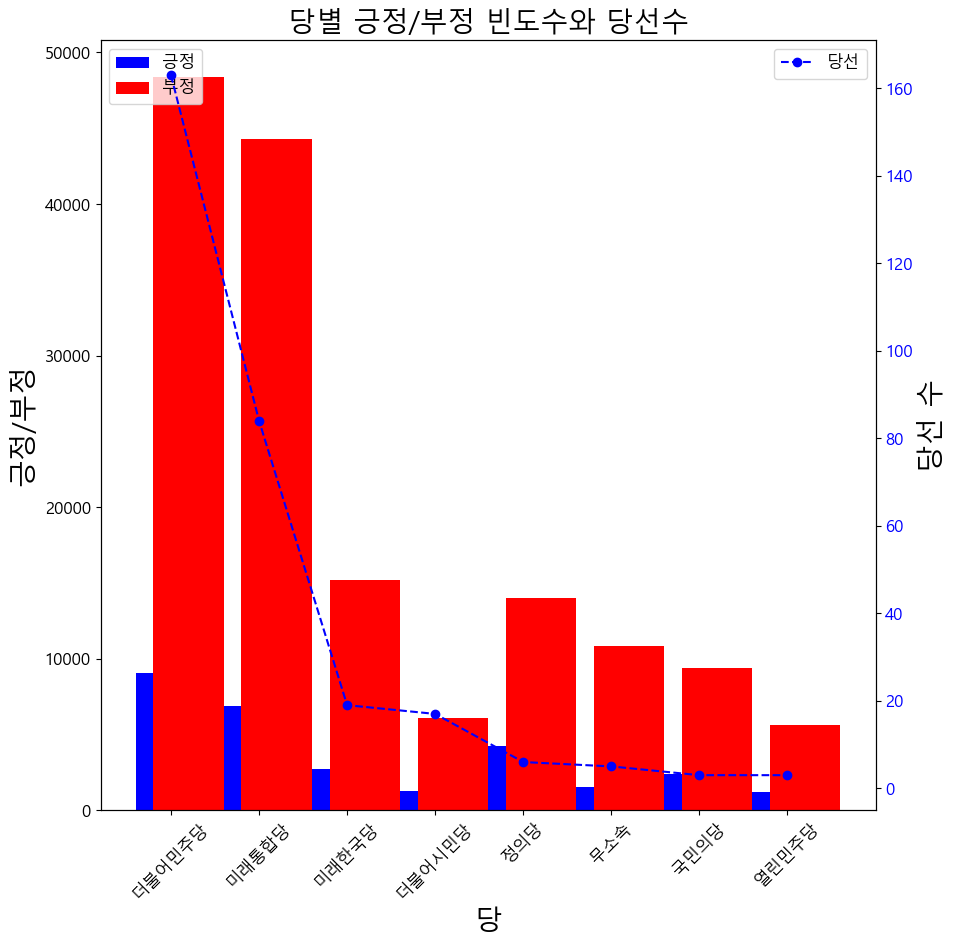

In [33]:
# 2중 그래프

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot() # bar 그래프


# bar 그래프 그리기
bar_width = 0.2
index = np.arange(len(df))
ax1.set_xticks(index);
ax1.set_xticklabels(df['party']);
ax1.bar(index, df['pos'], color = 'blue', label = '긍정')
ax1.bar(index + bar_width, df['neg'], color = 'red', label = '부정');
plt.xticks(rotation = 45);
plt.xlabel('당', fontsize = 20);
plt.ylabel('긍정/부정', fontsize = 20);
ax1.legend(loc = 'upper left');

# 선 그래프 그리기
ax2 = ax1.twinx();
ax2.plot(index, df['res'], color='b', linestyle='--', marker = 'o', label = '당선');
ax2.tick_params(axis = 'y', labelcolor = 'b');
plt.ylabel('당선 수', fontsize = 20);
ax2.legend();
plt.title('당별 긍정/부정 빈도수와 당선수', fontsize=20);

In [39]:
num_res_df.to_csv('./data/2020_결과.csv', index = False)